In [1]:
from tensorflow.keras.models import load_model

# Load VGG16 tuned model
model = load_model("models/vgg16_final_model.h5")  # or .keras file
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 7, 7, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │     6,422,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 3)              │           771 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21,138,245 (80.64 MB)

 Trainable params: 13,502,979 (51.51 MB)

 Non-trainable params: 7,635,264 (29.13 MB)

 Optimizer params: 2 (12.00 B)

# image-Covid19

In [2]:
import numpy as np
from tensorflow.keras.preprocessing import image

img_path = "covid_qu_ex_masked/test/COVID-19/covid_1582.png"
img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)
classes = ["COVID-19", "Non-COVID", "Normal"]

In [3]:
# Run prediction
probs = model.predict(img_array)[0]   # shape: (3,)

# Predicted class
pred_class = classes[np.argmax(probs)]

# Print in required format
print(f"Prediction: {pred_class}")
print(f"Probabilities: {list(probs)}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step
Prediction: COVID-19
Probabilities: [np.float32(0.6459183), np.float32(0.28014424), np.float32(0.073937505)]


In [4]:
from lime import lime_image
from skimage.segmentation import mark_boundaries
import matplotlib.pyplot as plt

explainer = lime_image.LimeImageExplainer()

explanation = explainer.explain_instance(
    img_array[0].astype('double'),
    model.predict,
    top_labels=1,
    hide_color=0,
    num_samples=1000
)


/opt/miniconda3/envs/minor/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


  1%|          | 10/1000 [00:01<02:23,  6.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 944ms/step


  2%|▏         | 20/1000 [00:02<01:55,  8.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 936ms/step


  3%|▎         | 30/1000 [00:03<01:45,  9.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 929ms/step


  4%|▍         | 40/1000 [00:04<01:40,  9.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 917ms/step


  5%|▌         | 50/1000 [00:05<01:36,  9.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 939ms/step


  6%|▌         | 60/1000 [00:06<01:34,  9.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 923ms/step


  7%|▋         | 70/1000 [00:07<01:32, 10.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


  8%|▊         | 80/1000 [00:08<01:35,  9.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 948ms/step


  9%|▉         | 90/1000 [00:09<01:32,  9.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 921ms/step


 10%|█         | 100/1000 [00:10<01:30,  9.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 950ms/step


 11%|█         | 110/1000 [00:11<01:28, 10.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 919ms/step


 12%|█▏        | 120/1000 [00:12<01:26, 10.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 13%|█▎        | 130/1000 [00:13<01:29,  9.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 14%|█▍        | 140/1000 [00:14<01:30,  9.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step   


 15%|█▌        | 150/1000 [00:15<01:30,  9.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 928ms/step


 16%|█▌        | 160/1000 [00:16<01:26,  9.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 927ms/step


 17%|█▋        | 170/1000 [00:17<01:24,  9.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 973ms/step


 18%|█▊        | 180/1000 [00:18<01:23,  9.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 949ms/step


 19%|█▉        | 190/1000 [00:19<01:22,  9.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 940ms/step


 20%|██        | 200/1000 [00:20<01:20,  9.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 21%|██        | 210/1000 [00:21<01:21,  9.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 22%|██▏       | 220/1000 [00:22<01:21,  9.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 23%|██▎       | 230/1000 [00:23<01:22,  9.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 24%|██▍       | 240/1000 [00:24<01:21,  9.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step   


 25%|██▌       | 250/1000 [00:26<01:20,  9.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 967ms/step


 26%|██▌       | 260/1000 [00:27<01:17,  9.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 970ms/step


 27%|██▋       | 270/1000 [00:28<01:15,  9.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 28%|██▊       | 280/1000 [00:29<01:18,  9.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 29%|██▉       | 290/1000 [00:30<01:17,  9.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 30%|███       | 300/1000 [00:31<01:17,  9.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step   


 31%|███       | 310/1000 [00:32<01:15,  9.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 32%|███▏      | 320/1000 [00:33<01:13,  9.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 33%|███▎      | 330/1000 [00:34<01:13,  9.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 34%|███▍      | 340/1000 [00:35<01:13,  9.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 35%|███▌      | 350/1000 [00:37<01:13,  8.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 36%|███▌      | 360/1000 [00:38<01:10,  9.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 37%|███▋      | 370/1000 [00:39<01:09,  9.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 38%|███▊      | 380/1000 [00:40<01:07,  9.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 39%|███▉      | 390/1000 [00:41<01:06,  9.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 40%|████      | 400/1000 [00:42<01:07,  8.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 41%|████      | 410/1000 [00:43<01:06,  8.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 42%|████▏     | 420/1000 [00:44<01:06,  8.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 43%|████▎     | 430/1000 [00:46<01:05,  8.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 44%|████▍     | 440/1000 [00:47<01:04,  8.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 45%|████▌     | 450/1000 [00:48<01:02,  8.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 46%|████▌     | 460/1000 [00:49<01:01,  8.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 47%|████▋     | 470/1000 [00:50<00:59,  8.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 48%|████▊     | 480/1000 [00:51<00:58,  8.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 49%|████▉     | 490/1000 [00:52<00:56,  8.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 50%|█████     | 500/1000 [00:53<00:55,  9.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 51%|█████     | 510/1000 [00:54<00:54,  9.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 52%|█████▏    | 520/1000 [00:56<00:54,  8.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 53%|█████▎    | 530/1000 [00:57<00:54,  8.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 54%|█████▍    | 540/1000 [00:58<00:52,  8.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 55%|█████▌    | 550/1000 [00:59<00:51,  8.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 56%|█████▌    | 560/1000 [01:00<00:49,  8.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 57%|█████▋    | 570/1000 [01:01<00:48,  8.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 58%|█████▊    | 580/1000 [01:03<00:47,  8.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 59%|█████▉    | 590/1000 [01:04<00:46,  8.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 60%|██████    | 600/1000 [01:05<00:46,  8.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 61%|██████    | 610/1000 [01:06<00:45,  8.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 62%|██████▏   | 620/1000 [01:07<00:46,  8.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 63%|██████▎   | 630/1000 [01:09<00:45,  8.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 64%|██████▍   | 640/1000 [01:10<00:43,  8.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 65%|██████▌   | 650/1000 [01:11<00:42,  8.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 66%|██████▌   | 660/1000 [01:12<00:40,  8.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 67%|██████▋   | 670/1000 [01:13<00:39,  8.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 68%|██████▊   | 680/1000 [01:15<00:37,  8.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 69%|██████▉   | 690/1000 [01:16<00:36,  8.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 70%|███████   | 700/1000 [01:17<00:34,  8.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 71%|███████   | 710/1000 [01:18<00:35,  8.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 72%|███████▏  | 720/1000 [01:20<00:35,  7.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 73%|███████▎  | 730/1000 [01:21<00:34,  7.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 74%|███████▍  | 740/1000 [01:22<00:32,  8.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 75%|███████▌  | 750/1000 [01:23<00:30,  8.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 76%|███████▌  | 760/1000 [01:24<00:28,  8.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 77%|███████▋  | 770/1000 [01:25<00:27,  8.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 78%|███████▊  | 780/1000 [01:27<00:26,  8.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 79%|███████▉  | 790/1000 [01:28<00:24,  8.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 80%|████████  | 800/1000 [01:29<00:23,  8.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 81%|████████  | 810/1000 [01:30<00:22,  8.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 82%|████████▏ | 820/1000 [01:31<00:21,  8.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 83%|████████▎ | 830/1000 [01:33<00:20,  8.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 84%|████████▍ | 840/1000 [01:34<00:19,  8.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 85%|████████▌ | 850/1000 [01:35<00:18,  8.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 86%|████████▌ | 860/1000 [01:36<00:17,  8.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 87%|████████▋ | 870/1000 [01:38<00:15,  8.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 88%|████████▊ | 880/1000 [01:39<00:14,  8.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 89%|████████▉ | 890/1000 [01:40<00:13,  8.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 90%|█████████ | 900/1000 [01:41<00:12,  8.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 91%|█████████ | 910/1000 [01:42<00:10,  8.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 92%|█████████▏| 920/1000 [01:44<00:09,  8.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 93%|█████████▎| 930/1000 [01:45<00:08,  8.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 94%|█████████▍| 940/1000 [01:46<00:07,  8.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 95%|█████████▌| 950/1000 [01:47<00:06,  8.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 96%|█████████▌| 960/1000 [01:49<00:04,  8.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 97%|█████████▋| 970/1000 [01:50<00:03,  8.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 98%|█████████▊| 980/1000 [01:51<00:02,  8.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 99%|█████████▉| 990/1000 [01:52<00:01,  8.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


100%|██████████| 1000/1000 [01:53<00:00,  8.78it/s]


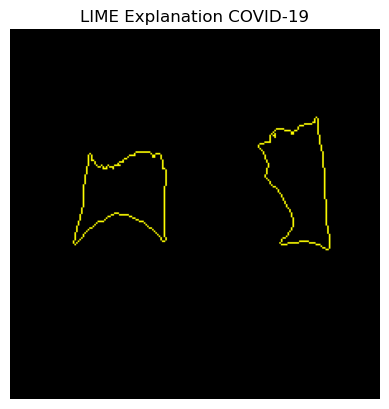

In [5]:
# Get explanation for top predicted class
temp, mask = explanation.get_image_and_mask(
    explanation.top_labels[0],
    positive_only=True,
    num_features=2,
    hide_rest=False
)

plt.imshow(mark_boundaries(temp / 255.0, mask))
plt.title(f"LIME Explanation {classes[explanation.top_labels[0]]}")
plt.axis('off')
plt.show()

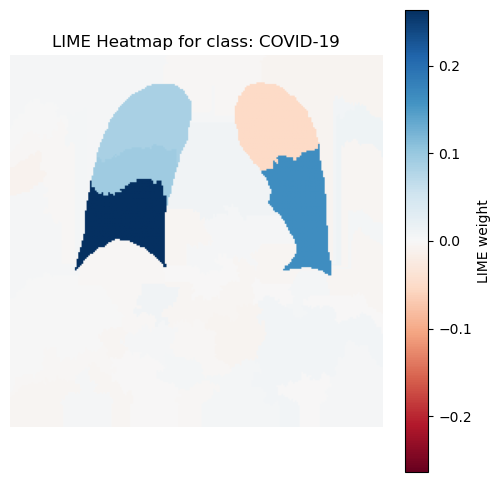

In [6]:
import matplotlib.pyplot as plt
import numpy as np

# Select the predicted class (same one LIME explained)
ind = explanation.top_labels[0]

# Map each explanation weight to the corresponding superpixel
dict_heatmap = dict(explanation.local_exp[ind])
heatmap = np.vectorize(dict_heatmap.get)(explanation.segments)

# Plot heatmap with symmetrical colorbar
plt.figure(figsize=(6,6))
plt.imshow(heatmap, cmap='RdBu', vmin=-abs(heatmap).max(), vmax=abs(heatmap).max())
plt.colorbar(label="LIME weight")
plt.title(f"LIME Heatmap for class: {classes[ind]}")
plt.axis("off")
plt.show()

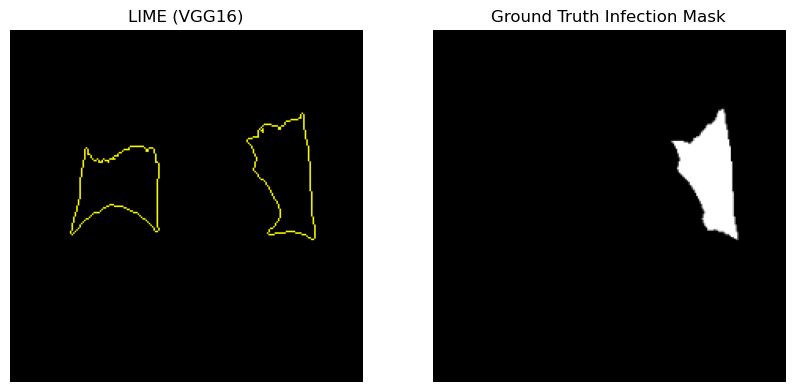

In [7]:
import cv2

# Load infection mask
mask_path = "covid_qu_ex/Infection Segmentation Data/Infection Segmentation Data/Test/COVID-19/infection masks/covid_1582.png"
infection_mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)
infection_mask_resized = cv2.resize(infection_mask, (224, 224))

plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.imshow(mark_boundaries(temp / 255.0, mask))
plt.title("LIME (VGG16)")
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(infection_mask_resized, cmap='gray')
plt.title("Ground Truth Infection Mask")
plt.axis('off')

plt.show()


# image-NonCovid

In [8]:
img_path = "covid_qu_ex_masked/test/Non-COVID/non_COVID (3251).png"
img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)
classes = ["COVID-19", "Non-COVID", "Normal"]

In [9]:
# Run prediction
probs = model.predict(img_array)[0]   # shape: (3,)

# Predicted class
pred_class = classes[np.argmax(probs)]

# Print in required format
print(f"Prediction: {pred_class}")
print(f"Probabilities: {list(probs)}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step
Prediction: Non-COVID
Probabilities: [np.float32(0.15343805), np.float32(0.83440316), np.float32(0.012158771)]


In [ ]:
from lime import lime_image
from skimage.segmentation import mark_boundaries
import matplotlib.pyplot as plt

explainer = lime_image.LimeImageExplainer()

explanation = explainer.explain_instance(
    img_array[0].astype('double'),
    model.predict,
    top_labels=1,
    hide_color=0,
    num_samples=1000
)

  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step   


  1%|          | 10/1000 [00:01<01:42,  9.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


  2%|▏         | 20/1000 [00:02<01:47,  9.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


  3%|▎         | 30/1000 [00:03<01:47,  9.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


  4%|▍         | 40/1000 [00:04<01:45,  9.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


  5%|▌         | 50/1000 [00:05<01:44,  9.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


  6%|▌         | 60/1000 [00:06<01:42,  9.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


  7%|▋         | 70/1000 [00:07<01:41,  9.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


  8%|▊         | 80/1000 [00:08<01:41,  9.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


  9%|▉         | 90/1000 [00:10<01:50,  8.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 10%|█         | 100/1000 [00:11<01:47,  8.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 11%|█         | 110/1000 [00:12<01:43,  8.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 12%|█▏        | 120/1000 [00:13<01:42,  8.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 13%|█▎        | 130/1000 [00:14<01:43,  8.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 14%|█▍        | 140/1000 [00:16<01:46,  8.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 15%|█▌        | 150/1000 [00:17<01:44,  8.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 16%|█▌        | 160/1000 [00:18<01:42,  8.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 17%|█▋        | 170/1000 [00:19<01:39,  8.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 18%|█▊        | 180/1000 [00:21<01:47,  7.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 19%|█▉        | 190/1000 [00:22<01:43,  7.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 20%|██        | 200/1000 [00:23<01:39,  8.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 21%|██        | 210/1000 [00:24<01:37,  8.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 22%|██▏       | 220/1000 [00:26<01:36,  8.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 23%|██▎       | 230/1000 [00:27<01:33,  8.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 24%|██▍       | 240/1000 [00:28<01:34,  8.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 25%|██▌       | 250/1000 [00:29<01:34,  7.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 26%|██▌       | 260/1000 [00:31<01:31,  8.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 27%|██▋       | 270/1000 [00:32<01:28,  8.21it/s]

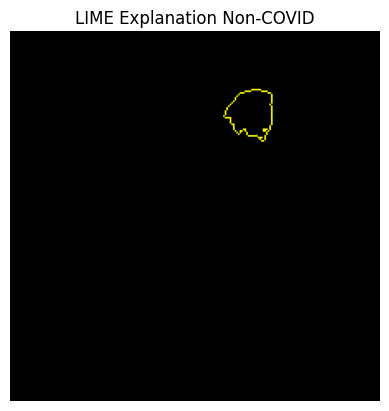

In [17]:
# Get explanation for top predicted class
temp, mask = explanation.get_image_and_mask(
    explanation.top_labels[0],
    positive_only=True,
    num_features=1,
    hide_rest=False
)

plt.imshow(mark_boundaries(temp / 255.0, mask))
plt.title(f"LIME Explanation {classes[explanation.top_labels[0]]}")
plt.axis('off')
plt.show()

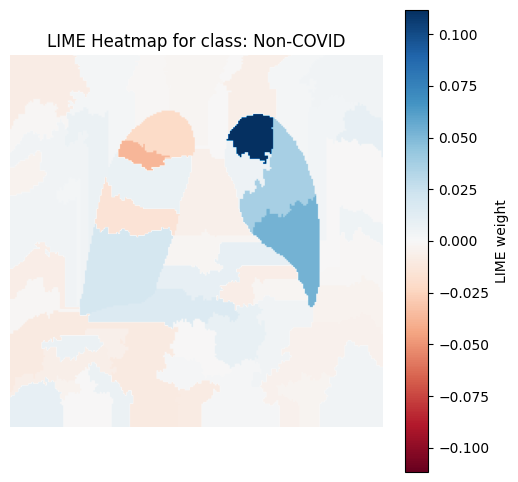

In [18]:
import matplotlib.pyplot as plt
import numpy as np

# Select the predicted class (same one LIME explained)
ind = explanation.top_labels[0]

# Map each explanation weight to the corresponding superpixel
dict_heatmap = dict(explanation.local_exp[ind])
heatmap = np.vectorize(dict_heatmap.get)(explanation.segments)

# Plot heatmap with symmetrical colorbar
plt.figure(figsize=(6,6))
plt.imshow(heatmap, cmap='RdBu', vmin=-abs(heatmap).max(), vmax=abs(heatmap).max())
plt.colorbar(label="LIME weight")
plt.title(f"LIME Heatmap for class: {classes[ind]}")
plt.axis("off")
plt.show()

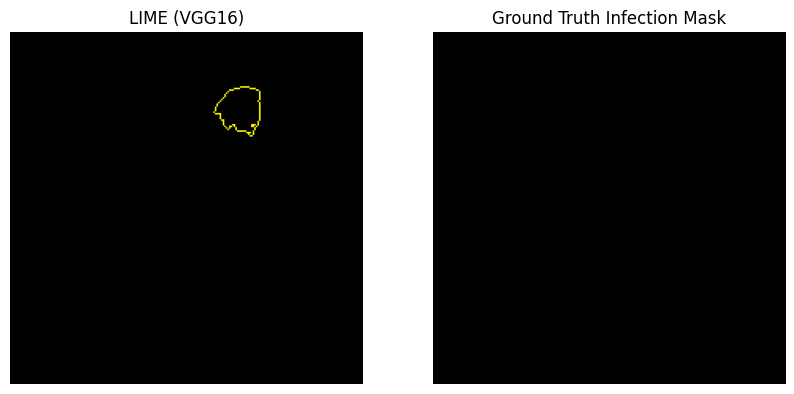

In [19]:
import cv2

# Load infection mask
mask_path = "covid_qu_ex/Infection Segmentation Data/Infection Segmentation Data/Test/Non-COVID/infection masks/non_COVID (3251).png"
infection_mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)
infection_mask_resized = cv2.resize(infection_mask, (224, 224))

plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.imshow(mark_boundaries(temp / 255.0, mask))
plt.title("LIME (VGG16)")
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(infection_mask_resized, cmap='gray')
plt.title("Ground Truth Infection Mask")
plt.axis('off')

plt.show()


# copilot


Processing image 1: covid_qu_ex_masked/test/COVID-19/covid_1579.png
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Prediction: COVID-19
Probabilities: [0.9897013, 0.010021532, 0.00027726797]


  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━

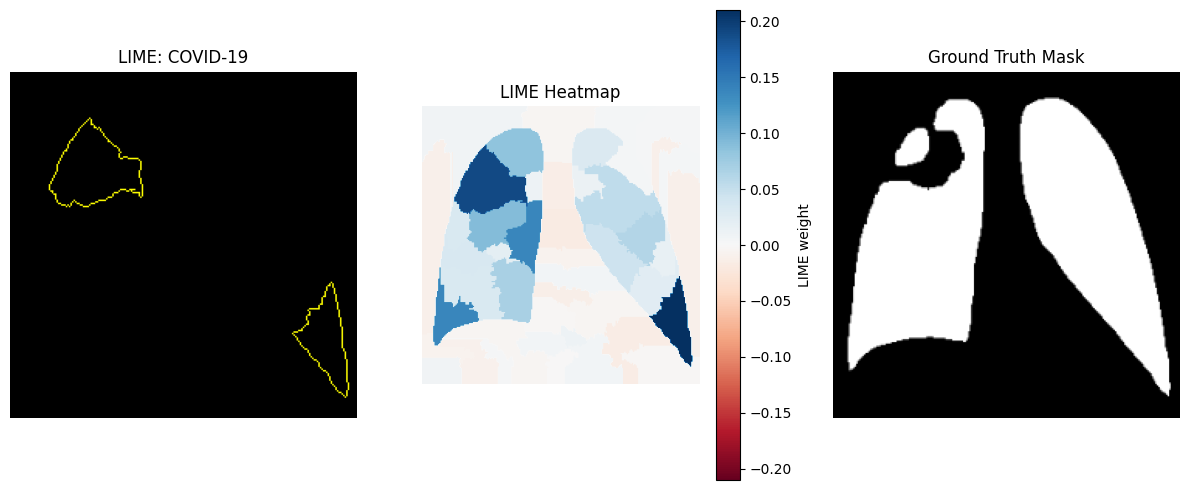


Processing image 2: covid_qu_ex_masked/test/COVID-19/covid_1582.png
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Prediction: COVID-19
Probabilities: [0.645918, 0.28014442, 0.07393759]


  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━

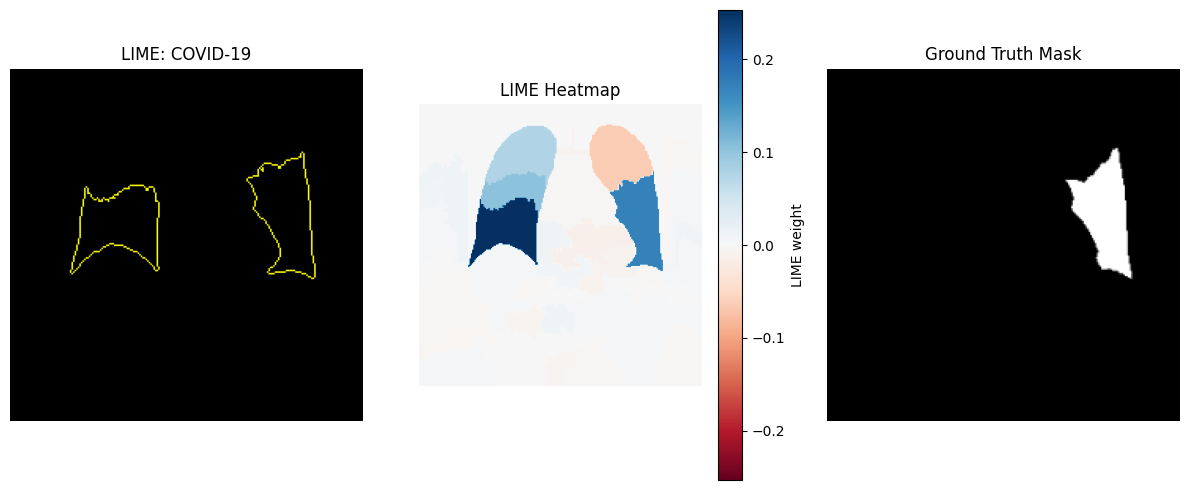


Processing image 3: covid_qu_ex_masked/test/COVID-19/covid_1583.png
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Prediction: Non-COVID
Probabilities: [0.22233015, 0.5170674, 0.2606025]


  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━

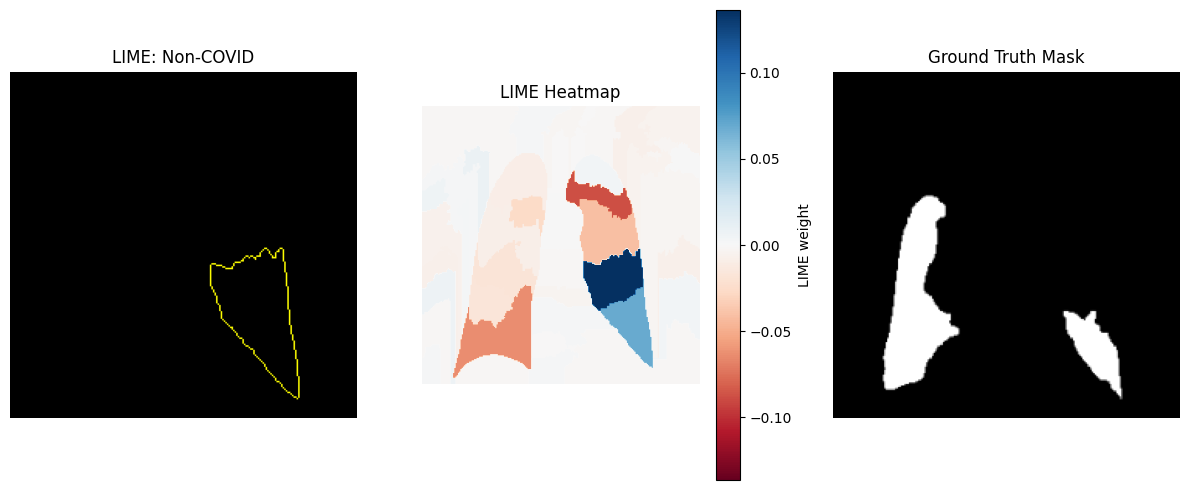


Processing image 4: covid_qu_ex_masked/test/COVID-19/covid_1584.png
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Prediction: COVID-19
Probabilities: [0.67314607, 0.22039996, 0.106453925]


  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━

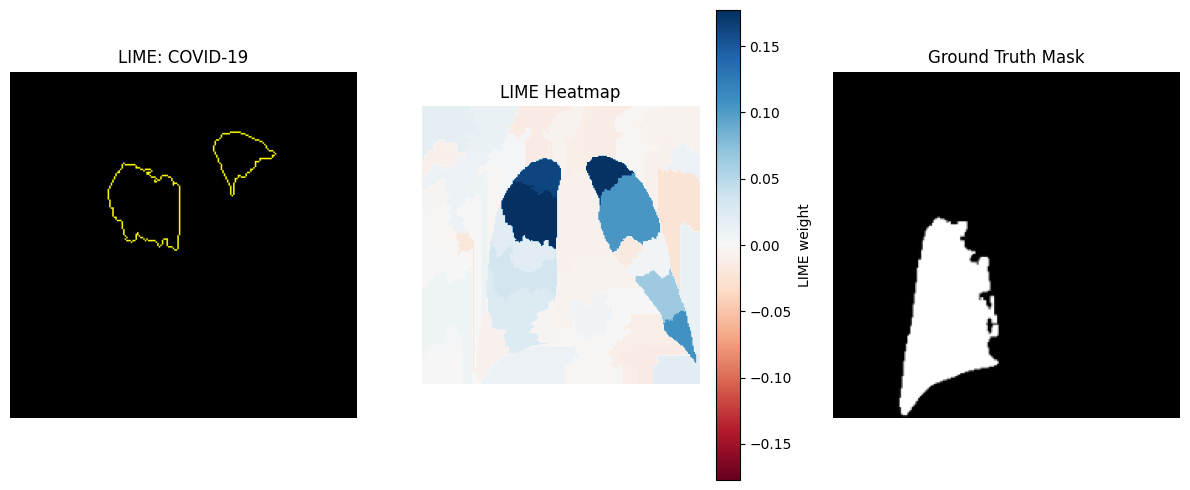


Processing image 5: covid_qu_ex_masked/test/COVID-19/covid_1585.png
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
Prediction: COVID-19
Probabilities: [0.99074626, 0.009249087, 4.567561e-06]


  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━

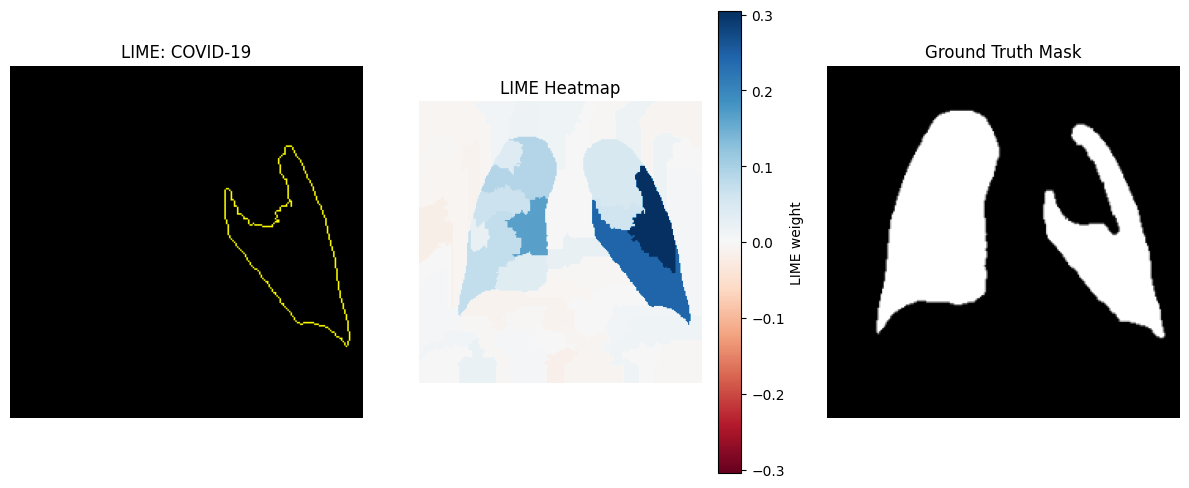


Processing image 6: covid_qu_ex_masked/test/COVID-19/covid_1586.png
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Prediction: COVID-19
Probabilities: [0.8815354, 0.11835556, 0.000109088476]


  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━

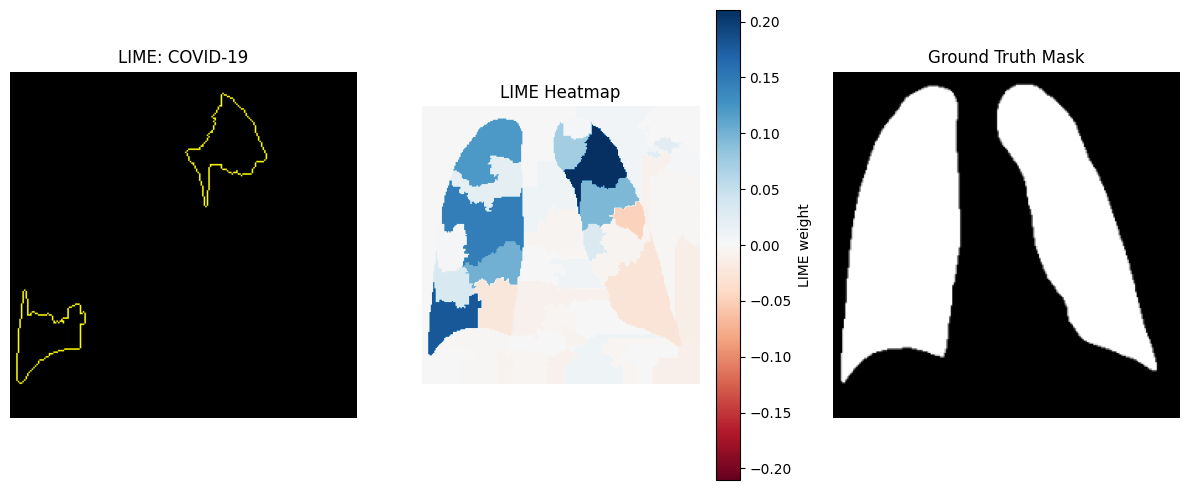


Processing image 7: covid_qu_ex_masked/test/COVID-19/covid_1587.png
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
Prediction: COVID-19
Probabilities: [0.55451065, 0.35807115, 0.087418206]


  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━

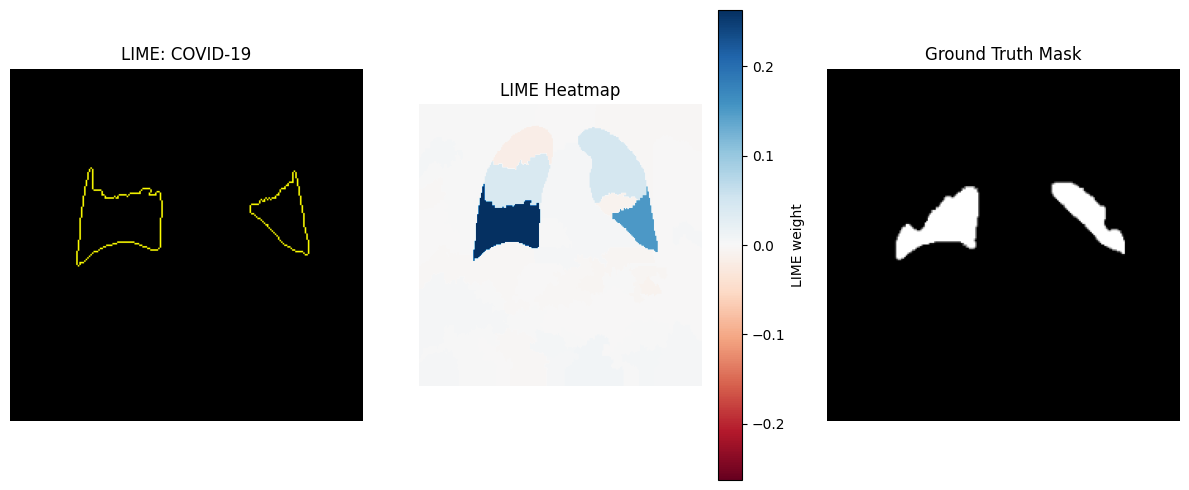


Processing image 8: covid_qu_ex_masked/test/COVID-19/covid_1590.png
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Prediction: COVID-19
Probabilities: [0.841299, 0.14758341, 0.011117575]


  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━

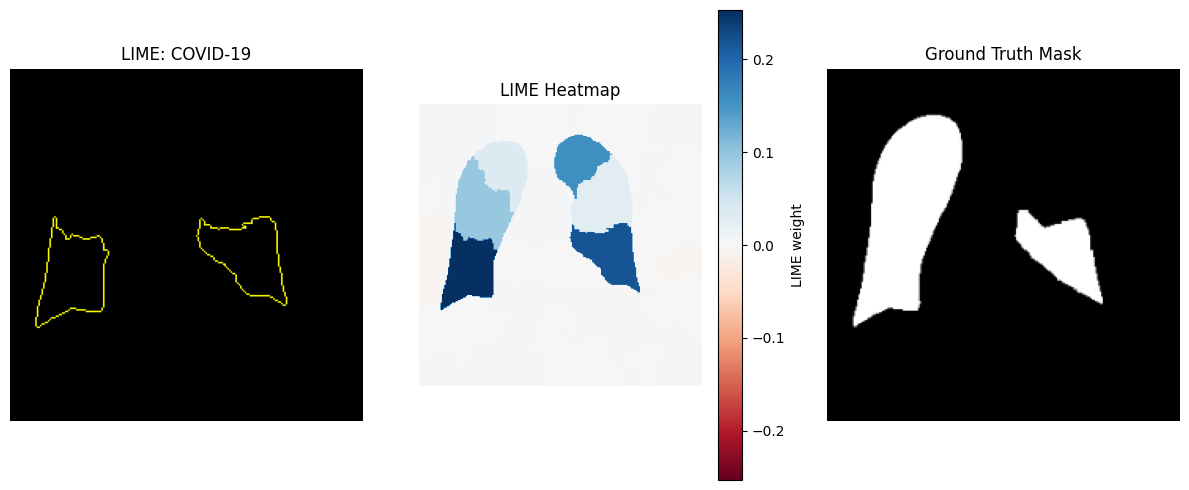


Processing image 9: covid_qu_ex_masked/test/COVID-19/covid_1591.png
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
Prediction: COVID-19
Probabilities: [0.9159561, 0.08177853, 0.0022654103]


  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━

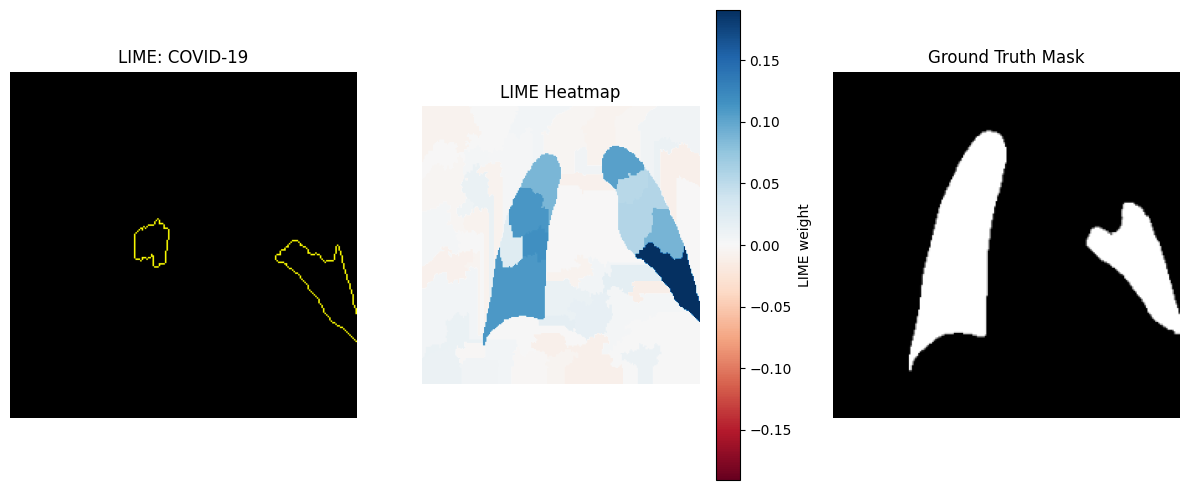


Processing image 10: covid_qu_ex_masked/test/COVID-19/covid_1592.png
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Prediction: COVID-19
Probabilities: [0.70063555, 0.28693306, 0.012431395]


  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━

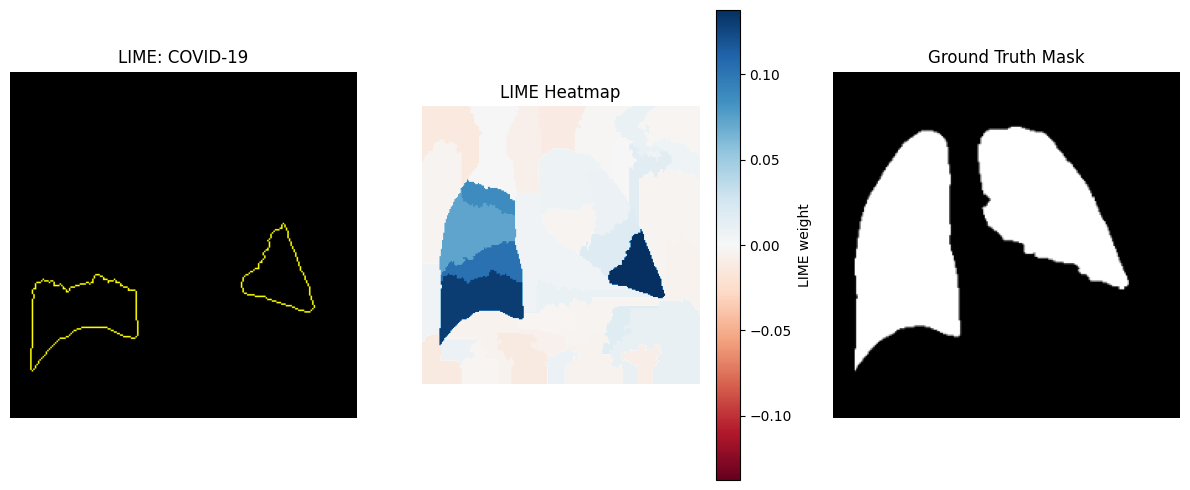

In [23]:
import numpy as np
from tensorflow.keras.preprocessing import image
from lime import lime_image
from skimage.segmentation import mark_boundaries
import matplotlib.pyplot as plt
import cv2

# List of image and corresponding mask paths (update with your actual file names)
img_paths = [
    "covid_qu_ex_masked/test/COVID-19/covid_1579.png",
    "covid_qu_ex_masked/test/COVID-19/covid_1582.png",
    "covid_qu_ex_masked/test/COVID-19/covid_1583.png",
    "covid_qu_ex_masked/test/COVID-19/covid_1584.png",
    "covid_qu_ex_masked/test/COVID-19/covid_1585.png",
    "covid_qu_ex_masked/test/COVID-19/covid_1586.png",
    "covid_qu_ex_masked/test/COVID-19/covid_1587.png",
    "covid_qu_ex_masked/test/COVID-19/covid_1590.png",
    "covid_qu_ex_masked/test/COVID-19/covid_1591.png",
    "covid_qu_ex_masked/test/COVID-19/covid_1592.png",
    
    # Add 9 more image paths here
]
mask_paths = [
    "covid_qu_ex/Infection Segmentation Data/Infection Segmentation Data/Test/COVID-19/infection masks/covid_1579.png",
    "covid_qu_ex/Infection Segmentation Data/Infection Segmentation Data/Test/COVID-19/infection masks/covid_1582.png",
    "covid_qu_ex/Infection Segmentation Data/Infection Segmentation Data/Test/COVID-19/infection masks/covid_1583.png",
    "covid_qu_ex/Infection Segmentation Data/Infection Segmentation Data/Test/COVID-19/infection masks/covid_1584.png",
    "covid_qu_ex/Infection Segmentation Data/Infection Segmentation Data/Test/COVID-19/infection masks/covid_1585.png",
    "covid_qu_ex/Infection Segmentation Data/Infection Segmentation Data/Test/COVID-19/infection masks/covid_1586.png",
    "covid_qu_ex/Infection Segmentation Data/Infection Segmentation Data/Test/COVID-19/infection masks/covid_1587.png",
    "covid_qu_ex/Infection Segmentation Data/Infection Segmentation Data/Test/COVID-19/infection masks/covid_1590.png",
    "covid_qu_ex/Infection Segmentation Data/Infection Segmentation Data/Test/COVID-19/infection masks/covid_1591.png",
    "covid_qu_ex/Infection Segmentation Data/Infection Segmentation Data/Test/COVID-19/infection masks/covid_1592.png",
    # Add 9 more mask paths here
]

classes = ["COVID-19", "Non-COVID", "Normal"]

for i in range(10):
    print(f"\nProcessing image {i+1}: {img_paths[i]}")
    img = image.load_img(img_paths[i], target_size=(224, 224))
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    # Prediction
    probs = model.predict(img_array)[0]
    pred_class = classes[np.argmax(probs)]
    print(f"Prediction: {pred_class}")
    print(f"Probabilities: {list(probs)}")

    # LIME explanation
    explainer = lime_image.LimeImageExplainer()
    explanation = explainer.explain_instance(
        img_array[0].astype('double'),
        model.predict,
        top_labels=1,
        hide_color=0,
        num_samples=1000
    )
    temp, mask = explanation.get_image_and_mask(
        explanation.top_labels[0],
        positive_only=True,
        num_features=2,
        hide_rest=False
    )

    # LIME explanation plot
    plt.figure(figsize=(12,5))
    plt.subplot(1,3,1)
    plt.imshow(mark_boundaries(temp / 255.0, mask))
    plt.title(f"LIME: {classes[explanation.top_labels[0]]}")
    plt.axis('off')

    # LIME heatmap
    ind = explanation.top_labels[0]
    dict_heatmap = dict(explanation.local_exp[ind])
    heatmap = np.vectorize(dict_heatmap.get)(explanation.segments)
    plt.subplot(1,3,2)
    plt.imshow(heatmap, cmap='RdBu', vmin=-abs(heatmap).max(), vmax=abs(heatmap).max())
    plt.colorbar(label="LIME weight")
    plt.title("LIME Heatmap")
    plt.axis("off")

    # Ground truth mask
    infection_mask = cv2.imread(mask_paths[i], cv2.IMREAD_GRAYSCALE)
    infection_mask_resized = cv2.resize(infection_mask, (224, 224))
    plt.subplot(1,3,3)
    plt.imshow(infection_mask_resized, cmap='gray')
    plt.title("Ground Truth Mask")
    plt.axis('off')

    plt.tight_layout()
    plt.show()